# Shopify App Store Capstone Project

## Section 1: Data Wrangling 
### Objectives

This notebook will be used to gather and organize data for my Shopify App Store Capstone Project

### 1. Sourcing and Loading
#### 1.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#### 1.2 Loading The Raw Data
Data sources:
    https://www.kaggle.com/datasets/usernam3/shopify-app-store
    

In [2]:
# Location of invididual CSV files being used
csv_dict = {
    'apps':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/apps.csv",
    'apps_categories':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/apps_categories.csv",
    'categories':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/categories.csv",
    'key_benefits':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/key_benefits.csv",
    'pricing_plan_features':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/pricing_plan_features.csv",
    'pricing_plans':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/pricing_plans.csv",
    'reviews':"/Users/msmith/Shopify_Analysis_Capstone/data/raw/reviews.csv"
}

# Reading each file into a dataframe & storing in a dictionary
df_dict = {}

for k, v in csv_dict.items():
    df = pd.read_csv(v)
    df_dict[k] = df

df_dict_keys = list(df_dict.keys())
print(df_dict_keys)



['apps', 'apps_categories', 'categories', 'key_benefits', 'pricing_plan_features', 'pricing_plans', 'reviews']


### 2. Cleaning, Transforming, and Visualizing Data
#### 2.1 Exploring the Data



In [3]:
#looping through csv summary info
for index, (k, v) in enumerate(df_dict.items()):
    print("DataFrame " + str(index + 1) + " of 7: " + k)
    print(v.shape)
    print(v.columns)
    print(v.index)
    print(v.isnull().sum())
    print(v.dtypes)
    print("----------------------------")


DataFrame 1 of 7: apps
(4750, 12)
Index(['id', 'url', 'title', 'developer', 'developer_link', 'icon', 'rating',
       'reviews_count', 'description_raw', 'description', 'tagline',
       'pricing_hint'],
      dtype='object')
RangeIndex(start=0, stop=4750, step=1)
id                    0
url                   0
title                 0
developer             0
developer_link        0
icon                  0
rating                0
reviews_count         0
description_raw       0
description           0
tagline               0
pricing_hint       1980
dtype: int64
id                  object
url                 object
title               object
developer           object
developer_link      object
icon                object
rating             float64
reviews_count        int64
description_raw     object
description         object
tagline             object
pricing_hint        object
dtype: object
----------------------------
DataFrame 2 of 7: apps_categories
(7376, 2)
Index(['app_id', 'cate

In [4]:
#Unpacking dictionary into separate dataframes
apps_df = df_dict['apps']
apps_categories_df = df_dict['apps_categories']
categories_df = df_dict['categories']
key_benefits_df = df_dict['key_benefits']
pricing_plan_features_df = df_dict['pricing_plan_features']
pricing_plans_df = df_dict['pricing_plans']
reviews_df = df_dict['reviews']

#### 2.2 Cleaning Data & Merging DataFrames
##### 2.2.1 Cleaning Tables

In [5]:
#apps_df
#renaming columns
apps_df.rename(columns={'title':'app_title'}, inplace=True)

In [6]:
#apps_categories_df & categories_df
#renaming columns
apps_categories_df.rename(columns={'app_id':'id'}, inplace=True)
categories_df.rename(columns={'id':'category_id','title':'app_category'}, inplace=True)

#merging tables to reduce future redundancy
categories= apps_categories_df.merge(categories_df, how='left', on = 'category_id')
categories.drop('category_id', axis=1, inplace=True)

print(categories.shape)
categories.head()

(7376, 2)


,id,app_category
0,9e4748a9-7eda-4814-83b6-0537d44152b1,Store design
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,Store design
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,Store design
3,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,Customer support
4,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,Store design


In [7]:
categories.app_category.value_counts()

Store design                         2087
Sales and conversion optimization    1294
Marketing                            1068
Orders and shipping                   858
Customer support                      409
Reporting                             350
Inventory management                  342
Productivity                          282
Finding and adding products           252
Finances                              163
Trust and security                    144
Places to sell                        127
Name: app_category, dtype: int64

In [8]:
#Creating dummy variables for each category & grouping by id
category_dummies = pd.get_dummies(categories, columns=['app_category'])
categories_dummied = category_dummies.groupby('id', as_index=False).agg('sum')
categories = categories_dummied
categories.head()

,id,app_category_Customer support,app_category_Finances,app_category_Finding and adding products,app_category_Inventory management,app_category_Marketing,app_category_Orders and shipping,app_category_Places to sell,app_category_Productivity,app_category_Reporting,app_category_Sales and conversion optimization,app_category_Store design,app_category_Trust and security
0,00014403-ad17-4c9b-bbcf-5adc27ba18a9,0,0,0,1,0,0,0,0,1,0,0,0
1,000270a8-af0b-4862-82df-25decbcc8d86,0,0,0,0,0,0,0,0,0,0,1,0
2,0006d5af-c461-4bdb-b32e-a4fecd00846b,0,0,0,0,0,0,0,0,0,0,1,0
3,001ce7ab-14dc-45ce-98f1-1b42b61c86c1,0,0,0,0,0,0,0,0,0,1,1,0
4,00215fb3-ff7c-4111-8f0c-8e7e2a9027fb,0,0,0,0,1,0,0,0,0,0,0,0


In [9]:
#Confirmation that dummy variables were not lost or aggregated
categories_dummied.iloc[:,1:].sum(axis=0).sort_values(ascending=False)

app_category_Store design                         2087
app_category_Sales and conversion optimization    1294
app_category_Marketing                            1068
app_category_Orders and shipping                   858
app_category_Customer support                      409
app_category_Reporting                             350
app_category_Inventory management                  342
app_category_Productivity                          282
app_category_Finding and adding products           252
app_category_Finances                              163
app_category_Trust and security                    144
app_category_Places to sell                        127
dtype: int64

In [10]:
#key_benefits_df
#renaming columns and reviewing status
key_benefits_df.rename(columns={'app_id':'id', 'title':'benefit_title', 'description':'benefit_description'}, inplace=True)
print(key_benefits_df.shape)
key_benefits_df.head()

(12927, 3)


,id,benefit_title,benefit_description
0,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,FAQ Accordion Product Info,Add a custom FAQ accordion with answers to com...
1,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,FAQ Accordion Refund Policy,Give your customers answers to refund policy q...
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,FAQ Accordion Page Builder,Reduce support time and answer common question...
3,9e4748a9-7eda-4814-83b6-0537d44152b1,Translate your store easily,Add 100+ languages in your store. Increase you...
4,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,Improve Conversions & Revenue,"Wheel of Fortune, Currency Converter, Animated..."


In [11]:
key_benefits_df.id.value_counts()

d6e49a3c-2f9f-4bfa-8c26-5d024faf2241    3
81608e15-e157-44c8-a5f0-e0864343c55f    3
33d11be2-3b01-44ce-94c3-2a8b5ef40a60    3
b8ff16ee-67a2-4394-95ce-aca15825b08e    3
5b01e3f2-770d-4530-b9aa-acb509d141f2    3
                                       ..
0ba314ac-1e1b-4740-86d2-5acc6220fad7    3
41ec2fb0-d4d8-40ab-b62c-213a19996ccf    3
4b8ab10d-d2ef-4af2-9af5-a98d0ae4b6ae    3
881fe88d-78cd-45e0-b013-291a9d287ee5    3
17918ea4-80b9-4811-947d-c0b2f950976a    3
Name: id, Length: 4309, dtype: int64

In [12]:
#Out of 12,927 starting rows, 11,073 benefit title's are unique
key_benefits_df.benefit_title.value_counts()

Increase Sales                    44
Easy to use                       39
Easy to Use                       29
Increase sales                    24
Customizable                      24
                                  ..
Have more calls and increase s     1
Take care of each customer con     1
Boost client trust                 1
Boost engagement                   1
Auto Order Confirmation            1
Name: benefit_title, Length: 11073, dtype: int64

In [13]:
#Consolidating dataframe to have a 1 to 1 relationship between app_id, benefit_title & benefit_description
#Apps with multiple benefit_title or benefit_description have been concatenated into one hybrid category
grouped_key_benefits = key_benefits_df.groupby("id", as_index=False).agg(
    {'benefit_title': lambda bt : ' || '.join(bt), 
     'benefit_description': lambda bd : ' || '.join(bd)
    })
print(grouped_key_benefits.shape)
grouped_key_benefits.head()

(4309, 3)


,id,benefit_title,benefit_description
0,00014403-ad17-4c9b-bbcf-5adc27ba18a9,Low Inventory alerts || Sales Forecasting || A...,Get an email report with the list of items tha...
1,000270a8-af0b-4862-82df-25decbcc8d86,AI Search || Conversion Rate Optimization || R...,"Advance Search Solution with AI search, Image..."
2,0006d5af-c461-4bdb-b32e-a4fecd00846b,Available for Kaleido Members || Link Preloadi...,You know the password? If you're a member and ...
3,001ce7ab-14dc-45ce-98f1-1b42b61c86c1,"Out of the box, Boost sales! || AI-driven Rule...","AI-driven exit intent pop up, boost sales！Out-..."
4,00215fb3-ff7c-4111-8f0c-8e7e2a9027fb,Get Better Sales & Engagement || Easy-To-Use F...,Increase your email marketing engagement and c...


In [14]:
#pricing_plan_features_df & pricing_plans_df
#renaming columns & reviewing status
pricing_plan_features_df.rename(columns={'pricing_plan_id':'id', 'app_id':'pricing_id','feature':'pricing_plan_feature'}, inplace=True)
pricing_plans_df.rename(columns={'id':'pricing_id', 'app_id':'id' ,'title':'pricing_plan_title'}, inplace=True)


print(pricing_plan_features_df.shape)
pricing_plan_features_df.head()

(23990, 3)


,pricing_id,id,pricing_plan_feature
0,88ed7ece-f8f7-48f0-af85-e8d0ab4a1d2d,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,5 Entries
1,88ed7ece-f8f7-48f0-af85-e8d0ab4a1d2d,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,Custom HTML
2,7238abeb-b83b-44a9-bc0f-922b6ccdf90f,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,40% OFF YEARLY PLANS THRU CYBER MONDAY!
3,002eac81-2169-452d-8491-7125b6d3855f,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,For stores on Basic Shopify plan
4,002eac81-2169-452d-8491-7125b6d3855f,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,All current and future apps Included


In [15]:
#grouping pricing plan features on pricing id & id. consolidating duplicate pricing_plan features
grouped_pricing_plan_features = pricing_plan_features_df.groupby(['pricing_id','id'], as_index=False).agg(
    {'pricing_plan_feature': lambda ppf : ' || '.join(ppf)})

In [16]:
#testing result of .agg
print(grouped_pricing_plan_features.shape)
grouped_pricing_plan_features.head()

(6087, 3)


,pricing_id,id,pricing_plan_feature
0,000843f0-bc81-4dea-a120-20ffa406090c,4c49aa82-34f8-4fca-b1de-f8283eab2077,Fulfill multiple orders & create shipping labe...
1,000ad3c8-2091-4425-bb22-9100940871cc,b582a9a4-da4f-4e5d-9f45-10ec31291794,One click enable/disable || Choose 5+ icons ||...
2,0010d6e7-7431-4c63-a224-ac73a0f2e887,289ed777-1867-43aa-abf2-42e4d406278f,"Everything in Business, plus: || Phone, Email ..."
3,0013f8ba-8e2a-4f35-a00e-40edba26b35f,f76d61da-cf58-4056-bcf6-c43948c9b8ac,"1,500 Average Impressions/Month || Unlimited a..."
4,002eac81-2169-452d-8491-7125b6d3855f,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,For stores on Basic Shopify plan || All curren...


In [17]:
#merging pricing & pricing_plans to create a hybrid table
pricing = pricing_plans_df.merge(grouped_pricing_plan_features, how='left', on=['pricing_id', 'id'])

print(pricing.shape)
pricing.head()

(8514, 5)


,pricing_id,id,pricing_plan_title,price,pricing_plan_feature
0,88ed7ece-f8f7-48f0-af85-e8d0ab4a1d2d,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,Free,Free,5 Entries || Custom HTML
1,f88514b2-ad9c-4625-adc8-2643625168f1,9e4748a9-7eda-4814-83b6-0537d44152b1,NaN,$7.99/month,NaN
2,002eac81-2169-452d-8491-7125b6d3855f,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,BASIC,$2.95/month,For stores on Basic Shopify plan || All curren...
3,7238abeb-b83b-44a9-bc0f-922b6ccdf90f,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,Starter,$4.99/month,40% OFF YEARLY PLANS THRU CYBER MONDAY! || No ...
4,2a8a95dd-5d6e-4bda-8605-d29816b0ecd5,d1476138-a608-4bb9-8d39-b30f3ca7617d,NaN,$5.99/month,NaN


In [18]:
#Creating dummy variables for pricing_titles
pricing.pricing_plan_title.value_counts()

Basic               398
Free                303
Basic Plan          262
Premium             255
Pro                 250
                   ... 
Medium Seller         1
Basic 300             1
Basic 500             1
Basic 1000            1
Product Calendar      1
Name: pricing_plan_title, Length: 1367, dtype: int64

In [19]:
#Creating manual grouping of dummy values based on top 50 pricing_plan_title
pricing.loc[pricing['pricing_plan_title'].str.contains('free', case=False,  na=False, regex=True), 'Tier_0_Free'] = 1
pricing.loc[pricing['pricing_plan_title'].str.contains('basic|starter|standard|essential|lite|small|bronze', case=False,  na=False, regex=True), 'Tier_1_Intro'] = 1
pricing.loc[pricing['pricing_plan_title'].str.contains('plus|silver|medium', case=False,  na=False, regex=True), 'Tier_2_Intermediate'] = 1
pricing.loc[pricing['pricing_plan_title'].str.contains('premium|pro|advanced|premium|gold', case=False,  na=False, regex=True), 'Tier_3_Advanced'] = 1
pricing.loc[pricing['pricing_plan_title'].str.contains('enterprise|business|platinum', case=False,  na=False, regex=True), 'Tier_4_Enterprise'] = 1
pricing['Tier_Outliers'] = 0

In [20]:
#filling null dummy values with 0
pricing[['Tier_0_Free', 'Tier_1_Intro','Tier_2_Intermediate','Tier_3_Advanced','Tier_4_Enterprise']] = pricing[['Tier_0_Free', 'Tier_1_Intro','Tier_2_Intermediate','Tier_3_Advanced','Tier_4_Enterprise']].fillna(0)

#Changing dummy value column types to integer
pricing['Tier_0_Free'] = pd.to_numeric(pricing['Tier_0_Free'], downcast='integer')
pricing['Tier_1_Intro'] = pd.to_numeric(pricing['Tier_1_Intro'], downcast='integer')
pricing['Tier_2_Intermediate'] = pd.to_numeric(pricing['Tier_2_Intermediate'], downcast='integer')
pricing['Tier_3_Advanced'] = pd.to_numeric(pricing['Tier_3_Advanced'], downcast='integer')
pricing['Tier_4_Enterprise'] = pd.to_numeric(pricing['Tier_4_Enterprise'], downcast='integer')

In [21]:
#Populating outlier category dummy values
outlier_series = pricing['Tier_0_Free'] + pricing['Tier_1_Intro'] + pricing['Tier_2_Intermediate'] + pricing['Tier_3_Advanced'] + pricing['Tier_4_Enterprise']

#Setting dummy values being double counted back to 0 --> then grouping in outliers
pricing.loc[outlier_series > 1, ['Tier_0_Free', 'Tier_1_Intro','Tier_2_Intermediate','Tier_3_Advanced','Tier_4_Enterprise']] = 0
pricing['Tier_Outliers'] = np.where(outlier_series == 0, 1, 0)

In [22]:
#Checking columns to ensure no double counting
pricing_sums = [pricing.Tier_0_Free.sum(),
pricing.Tier_1_Intro.sum(),
pricing.Tier_2_Intermediate.sum(),
pricing.Tier_3_Advanced.sum(),
pricing.Tier_4_Enterprise.sum(), 
pricing.Tier_Outliers.sum()]

print(pricing_sums)
print(sum(pricing_sums))

[682, 1691, 270, 1542, 331, 3926]
8442


In [23]:
#String operations to clean price column and separate into price / frequency columns
pricing['price'] = pricing['price'].str.replace(' one time charge', '/one-time')
pricing[['price','price_frequency']] = pricing.price.str.split("/",expand=True)
pricing['price'] = pricing['price'].str.replace(r'(^.*Free.*$)', '0')
pricing['price'] = pricing['price'].str.lstrip(to_strip='$')
pricing['price'] = pricing['price'].str.replace(",","")

/var/folders/xl/fjbbhy9n7658lhdhcr7mr9pc0000gn/T/ipykernel_5393/1977056245.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  pricing['price'] = pricing['price'].str.replace(r'(^.*Free.*$)', '0')


In [24]:
pricing.price.value_counts()

0        2242
9.99      397
4.99      341
29        229
5         210
         ... 
6.67        1
1.85        1
29.97       1
59.97       1
20.95       1
Name: price, Length: 418, dtype: int64

In [25]:
pricing.dtypes

pricing_id              object
id                      object
pricing_plan_title      object
price                   object
pricing_plan_feature    object
Tier_0_Free               int8
Tier_1_Intro              int8
Tier_2_Intermediate       int8
Tier_3_Advanced           int8
Tier_4_Enterprise         int8
Tier_Outliers            int64
price_frequency         object
dtype: object

In [26]:
pricing['tier_0_price'] = np.where(pricing['Tier_0_Free'] == 1, 0, np.nan)
pricing['tier_0_price_frequency'] = np.where(pricing['Tier_0_Free'] == 1, pricing['price_frequency'], np.nan)

pricing['tier_1_price'] = np.where(pricing['Tier_1_Intro'] == 1, pricing['price'], np.nan)
pricing['tier_1_price_frequency'] = np.where(pricing['Tier_1_Intro'] == 1, pricing['price_frequency'], np.nan)

pricing['tier_2_price'] = np.where(pricing['Tier_2_Intermediate'] == 1, pricing['price'], np.nan)
pricing['tier_2_price_frequency'] = np.where(pricing['Tier_2_Intermediate'] == 1, pricing['price_frequency'], np.nan)

pricing['tier_3_price'] = np.where(pricing['Tier_3_Advanced'] == 1, pricing['price'], np.nan)
pricing['tier_3_price_frequency'] = np.where(pricing['Tier_3_Advanced'] == 1, pricing['price_frequency'], np.nan)

pricing['tier_4_price'] = np.where(pricing['Tier_4_Enterprise'] == 1, pricing['price'], np.nan)
pricing['tier_4_price_frequency'] = np.where(pricing['Tier_4_Enterprise'] == 1, pricing['price_frequency'], np.nan)

pricing['tier_outlier_price'] = np.where(pricing['Tier_Outliers'] == 1, pricing['price'], np.nan)
pricing['tier_outlier_price_frequency'] = np.where(pricing['Tier_Outliers'] == 1, pricing['price_frequency'], np.nan)

In [27]:
pricing.columns

Index(['pricing_id', 'id', 'pricing_plan_title', 'price',
       'pricing_plan_feature', 'Tier_0_Free', 'Tier_1_Intro',
       'Tier_2_Intermediate', 'Tier_3_Advanced', 'Tier_4_Enterprise',
       'Tier_Outliers', 'price_frequency', 'tier_0_price',
       'tier_0_price_frequency', 'tier_1_price', 'tier_1_price_frequency',
       'tier_2_price', 'tier_2_price_frequency', 'tier_3_price',
       'tier_3_price_frequency', 'tier_4_price', 'tier_4_price_frequency',
       'tier_outlier_price', 'tier_outlier_price_frequency'],
      dtype='object')

In [28]:
pricing_summary_df = pricing.groupby(['id']).agg({'pricing_plan_title': 'first',
                             'pricing_plan_feature': 'first', 
                             'Tier_0_Free':'sum', 
                             'Tier_1_Intro':'sum',
                             'Tier_2_Intermediate':'sum', 
                             'Tier_3_Advanced':'sum', 
                             'Tier_4_Enterprise':'sum',
                             'Tier_Outliers':'sum', 
                             'tier_0_price': 'first',
                             'tier_0_price_frequency': 'first', 
                             'tier_1_price': 'first', 
                             'tier_1_price_frequency': 'first',
                             'tier_2_price': 'first', 'tier_2_price_frequency': 'first', 'tier_3_price': 'first',
       'tier_3_price_frequency': 'first', 'tier_4_price': 'first', 'tier_4_price_frequency': 'first',
       'tier_outlier_price': 'first', 'tier_outlier_price_frequency': 'first'})

In [29]:
#reviews_df - not modified at this time

In [30]:
#Creation of app summary dataframe
#consists of: apps_df + categories + grouped_key_benefits
one_df = apps_df
two_df = one_df.merge(categories, how = 'left', on = 'id', suffixes = ('','_2'))
app_summary_df = two_df.merge(grouped_key_benefits, how = 'left', on = 'id', suffixes =('','_3'))
df = app_summary_df.merge(pricing_summary_df, how = 'left', on = 'id', suffixes =('_app', '_price'))

In [31]:
#reviewing completed app_summary_df dataframe
print(app_summary_df.shape)
app_summary_df.head()

(4750, 26)


,id,url,app_title,developer,developer_link,icon,rating,reviews_count,description_raw,description,tagline,pricing_hint,app_category_Customer support,app_category_Finances,app_category_Finding and adding products,app_category_Inventory management,app_category_Marketing,app_category_Orders and shipping,app_category_Places to sell,app_category_Productivity,app_category_Reporting,app_category_Sales and conversion optimization,app_category_Store design,app_category_Trust and security,benefit_title,benefit_description
0,9e4748a9-7eda-4814-83b6-0537d44152b1,https://apps.shopify.com/translate,Panda Language Translate,Panda Apps,https://apps.shopify.com/partners/ittechzilla,https://apps.shopifycdn.com/listing_images/269...,4.7,379,"<div class=""block app-listing__detailed-descri...",Panda Language Translation improve your busine...,Translate your store into multiple languages,7-day free trial,0,0,0,0,0,0,0,0,0,0,1,0,Translate your store easily || Powerful transl...,Add 100+ languages in your store. Increase you...
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,https://apps.shopify.com/instant-brand-page,Instant Brand Page,Low Fruit Solutions PTY LTD,https://apps.shopify.com/partners/lowfruitsolu...,https://apps.shopifycdn.com/listing_images/51d...,4.9,13,"<div class=""block app-listing__detailed-descri...",Having a brand page gives your shoppers a quic...,A-Z Brand Index Page and Favourites Slider,10-day free trial,0,0,0,0,0,0,0,0,0,0,1,0,Quick and Easy Install || Use Custom brand ima...,No coding skills or changes required! Customis...
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,https://apps.shopify.com/powr-faq,FAQ Accordion | Help Center,POWR.io,https://apps.shopify.com/partners/powr-io,https://apps.shopifycdn.com/listing_images/86c...,4.5,202,"<div class=""block app-listing__detailed-descri...","Create, organize and display Frequently Asked ...","FAQ page, FAQ accordion menu for product Info ...",NaN,1,0,0,0,0,0,0,0,0,0,1,0,FAQ Accordion Product Info || FAQ Accordion Re...,Add a custom FAQ accordion with answers to com...
3,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,https://apps.shopify.com/mps-promote-me,Promote Me | Many apps in one,MakeProSimp,https://apps.shopify.com/partners/makeprosimp,https://apps.shopifycdn.com/listing_images/5dc...,4.9,18,"<div class=""block app-listing__detailed-descri...",Promote Me app is a bundle of apps that includ...,"Spin Wheel,Currency Converter,Quick ATC Button...",10-day free trial,0,0,0,0,0,0,0,0,0,1,1,0,Improve Conversions & Revenue || Create Emerge...,"Wheel of Fortune, Currency Converter, Animated..."
4,7aac2a1f-ff03-4f38-aeb7-7619403a6f05,https://apps.shopify.com/installify-boost-mobi...,Instalify,Plobal Apps,https://apps.shopify.com/partners/plobal-apps,https://apps.shopifycdn.com/listing_images/737...,0.0,0,"<div class=""block app-listing__detailed-descri...",We are trusted by hundreds of Shopify and Shop...,Supercharge Your Mobile App Installs,7-day free trial,0,0,0,0,0,0,0,0,0,0,1,0,Drive Organic App Installs || Quick & Easy Set...,Organically keep increasing your mobile app in...


In [32]:
#checking for missing values on app_summary dataframe
missing = pd.concat([app_summary_df.isnull().sum(), 100 * app_summary_df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing = missing.sort_values(by=['count'], ascending = False)

print(missing)

                                                count          %
pricing_hint                                     1980  41.684211
benefit_description                               441   9.284211
benefit_title                                     441   9.284211
app_category_Finding and adding products            0   0.000000
app_category_Trust and security                     0   0.000000
app_category_Store design                           0   0.000000
app_category_Sales and conversion optimization      0   0.000000
app_category_Reporting                              0   0.000000
app_category_Productivity                           0   0.000000
app_category_Places to sell                         0   0.000000
app_category_Orders and shipping                    0   0.000000
app_category_Marketing                              0   0.000000
app_category_Inventory management                   0   0.000000
id                                                  0   0.000000
url                      

In [33]:
#reviewing pricing_summary_df shape & status
print(pricing_summary_df.shape)
pricing_summary_df.head()

(4750, 20)


,pricing_plan_title,pricing_plan_feature,Tier_0_Free,Tier_1_Intro,Tier_2_Intermediate,Tier_3_Advanced,Tier_4_Enterprise,Tier_Outliers,tier_0_price,tier_0_price_frequency,tier_1_price,tier_1_price_frequency,tier_2_price,tier_2_price_frequency,tier_3_price,tier_3_price_frequency,tier_4_price,tier_4_price_frequency,tier_outlier_price,tier_outlier_price_frequency
id,,,,,,,,,,,,,,,,,,,,
00014403-ad17-4c9b-bbcf-5adc27ba18a9,Email Alerts Basic,Daily/Weekly email alerts || Set alerts on sto...,0,1,0,1,0,1,NaN,None,9,month,None,None,25,month,None,None,50,month
000270a8-af0b-4862-82df-25decbcc8d86,STARTER,500 products || Unlimited search requests || B...,0,1,0,0,1,1,NaN,None,9.99,month,None,None,None,None,99.99,month,29.99,month
0006d5af-c461-4bdb-b32e-a4fecd00846b,None,None,0,0,0,0,0,1,NaN,None,None,None,None,None,None,None,None,None,99,one-time
001ce7ab-14dc-45ce-98f1-1b42b61c86c1,None,None,0,0,0,0,0,1,NaN,None,None,None,None,None,None,None,None,None,0,None
00215fb3-ff7c-4111-8f0c-8e7e2a9027fb,FREE,Create UNLIMITED customer segments for advance...,1,0,1,0,0,0,0.0,None,None,None,14.99,month,None,None,None,None,None,None


In [34]:
pricing_summary_df.pricing_plan_title.value_counts()

Free            291
Basic           255
Basic Plan      197
Starter         133
Free Plan       121
               ... 
Art Director      1
R2D2 plan         1
ESSENTIAL         1
Droplet           1
Helpful           1
Name: pricing_plan_title, Length: 562, dtype: int64

In [35]:
#checking for missing values on the pricing_summary_df
missing_prices = pd.concat([pricing_summary_df.isnull().sum(), 100 * pricing_summary_df.isnull().mean()], axis=1)
missing_prices.columns=['count', '%']
missing_prices = missing_prices.sort_values(by=['count'], ascending = False)

print(missing_prices)

                              count          %
tier_0_price_frequency         4739  99.768421
tier_2_price_frequency         4489  94.505263
tier_2_price                   4489  94.505263
tier_4_price_frequency         4442  93.515789
tier_4_price                   4439  93.452632
tier_0_price                   4070  85.684211
tier_1_price_frequency         3488  73.431579
tier_3_price_frequency         3438  72.378947
tier_3_price                   3437  72.357895
tier_1_price                   3338  70.273684
tier_outlier_price_frequency   2597  54.673684
pricing_plan_feature           2349  49.452632
pricing_plan_title             2285  48.105263
tier_outlier_price             1347  28.357895
Tier_Outliers                     0   0.000000
Tier_4_Enterprise                 0   0.000000
Tier_3_Advanced                   0   0.000000
Tier_2_Intermediate               0   0.000000
Tier_1_Intro                      0   0.000000
Tier_0_Free                       0   0.000000


In [36]:
#reviewing df shape & status
print(df.shape)
df.head()

(4750, 46)


,id,url,app_title,developer,developer_link,icon,rating,reviews_count,description_raw,description,tagline,pricing_hint,app_category_Customer support,app_category_Finances,app_category_Finding and adding products,app_category_Inventory management,app_category_Marketing,app_category_Orders and shipping,app_category_Places to sell,app_category_Productivity,app_category_Reporting,app_category_Sales and conversion optimization,app_category_Store design,app_category_Trust and security,benefit_title,benefit_description,pricing_plan_title,pricing_plan_feature,Tier_0_Free,Tier_1_Intro,Tier_2_Intermediate,Tier_3_Advanced,Tier_4_Enterprise,Tier_Outliers,tier_0_price,tier_0_price_frequency,tier_1_price,tier_1_price_frequency,tier_2_price,tier_2_price_frequency,tier_3_price,tier_3_price_frequency,tier_4_price,tier_4_price_frequency,tier_outlier_price,tier_outlier_price_frequency
0,9e4748a9-7eda-4814-83b6-0537d44152b1,https://apps.shopify.com/translate,Panda Language Translate,Panda Apps,https://apps.shopify.com/partners/ittechzilla,https://apps.shopifycdn.com/listing_images/269...,4.7,379,"<div class=""block app-listing__detailed-descri...",Panda Language Translation improve your busine...,Translate your store into multiple languages,7-day free trial,0,0,0,0,0,0,0,0,0,0,1,0,Translate your store easily || Powerful transl...,Add 100+ languages in your store. Increase you...,None,None,0,0,0,0,0,1,NaN,None,None,None,None,None,None,None,None,None,7.99,month
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,https://apps.shopify.com/instant-brand-page,Instant Brand Page,Low Fruit Solutions PTY LTD,https://apps.shopify.com/partners/lowfruitsolu...,https://apps.shopifycdn.com/listing_images/51d...,4.9,13,"<div class=""block app-listing__detailed-descri...",Having a brand page gives your shoppers a quic...,A-Z Brand Index Page and Favourites Slider,10-day free trial,0,0,0,0,0,0,0,0,0,0,1,0,Quick and Easy Install || Use Custom brand ima...,No coding skills or changes required! Customis...,None,None,0,0,0,0,0,1,NaN,None,None,None,None,None,None,None,None,None,5.99,month
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,https://apps.shopify.com/powr-faq,FAQ Accordion | Help Center,POWR.io,https://apps.shopify.com/partners/powr-io,https://apps.shopifycdn.com/listing_images/86c...,4.5,202,"<div class=""block app-listing__detailed-descri...","Create, organize and display Frequently Asked ...","FAQ page, FAQ accordion menu for product Info ...",NaN,1,0,0,0,0,0,0,0,0,0,1,0,FAQ Accordion Product Info || FAQ Accordion Re...,Add a custom FAQ accordion with answers to com...,Free,5 Entries || Custom HTML,1,1,0,1,1,0,0.0,None,4.99,month,None,None,11.99,month,79.99,month,None,None
3,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,https://apps.shopify.com/mps-promote-me,Promote Me | Many apps in one,MakeProSimp,https://apps.shopify.com/partners/makeprosimp,https://apps.shopifycdn.com/listing_images/5dc...,4.9,18,"<div class=""block app-listing__detailed-descri...",Promote Me app is a bundle of apps that includ...,"Spin Wheel,Currency Converter,Quick ATC Button...",10-day free trial,0,0,0,0,0,0,0,0,0,1,1,0,Improve Conversions & Revenue || Create Emerge...,"Wheel of Fortune, Currency Converter, Animated...",BASIC,For stores on Basic Shopify plan || All curren...,0,1,1,1,0,1,NaN,None,2.95,month,16.95,month,8.95,month,None,None,4.95,month
4,7aac2a1f-ff03-4f38-aeb7-7619403a6f05,https://apps.shopify.com/installify-boost-mobi...,Instalify,Plobal Apps,https://apps.shopify.com/partners/plobal-apps,https://apps.shopifycdn.com/listing_images/737...,0.0,0,"<div class=""block app-listing__detailed-descri...",We are trusted by hundreds of Shopify and Shop...,Supercharge Your Mobile App Installs,7-day free trial,0,0,0,0,0,0,0,0,0,0,1,0,Drive Organic App Installs || Quick & Easy Set...,Organically keep increasing your mobile app in...,None,None,0,0,0,0,0,1,NaN,None,None,None,None,None,None,None,None,None,4.99,month


In [37]:
missing_all = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing_all.columns=['count', '%']
missing_all = missing_all.sort_values(by=['count'], ascending = False)

print(missing_all)

                                                count          %
tier_0_price_frequency                           4739  99.768421
tier_2_price_frequency                           4489  94.505263
tier_2_price                                     4489  94.505263
tier_4_price_frequency                           4442  93.515789
tier_4_price                                     4439  93.452632
tier_0_price                                     4070  85.684211
tier_1_price_frequency                           3488  73.431579
tier_3_price_frequency                           3438  72.378947
tier_3_price                                     3437  72.357895
tier_1_price                                     3338  70.273684
tier_outlier_price_frequency                     2597  54.673684
pricing_plan_feature                             2349  49.452632
pricing_plan_title                               2285  48.105263
pricing_hint                                     1980  41.684211
tier_outlier_price       

In [38]:
#reviewing reviews shape & status
print(reviews_df.shape)
reviews_df.head()

(447317, 8)


,app_id,author,rating,posted_at,body,helpful_count,developer_reply,developer_reply_posted_at
0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,"August 6, 2020",Great and super fast customer service! Highly ...,0,NaN,NaN
1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,"August 4, 2020","Still setting up my store, and after initially...",0,NaN,NaN
2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,"August 4, 2020","This is an excellent search app, which they ha...",0,NaN,NaN
3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,"July 30, 2020","A+, great great great customer service! thanks...",0,NaN,NaN
4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,"July 28, 2020","I'm begginig to use this app, the search engin...",0,NaN,NaN


In [39]:
#checking for missing values on reviews_df dataframe
missing_reviews = pd.concat([reviews_df.isnull().sum(), 100 * reviews_df.isnull().mean()], axis=1)
missing_reviews.columns=['count', '%']
missing_reviews = missing_reviews.sort_values(by=['count'], ascending = False)

print(missing_reviews)

                            count          %
developer_reply            399756  89.367496
developer_reply_posted_at  399756  89.367496
body                          201   0.044935
author                        124   0.027721
app_id                          0   0.000000
rating                          0   0.000000
posted_at                       0   0.000000
helpful_count                   0   0.000000


## Section 2: Exploratory Data Analysis

In [40]:
df.dtypes

id                                                 object
url                                                object
app_title                                          object
developer                                          object
developer_link                                     object
icon                                               object
rating                                            float64
reviews_count                                       int64
description_raw                                    object
description                                        object
tagline                                            object
pricing_hint                                       object
app_category_Customer support                       uint8
app_category_Finances                               uint8
app_category_Finding and adding products            uint8
app_category_Inventory management                   uint8
app_category_Marketing                              uint8
app_category_O

In [41]:
#update dtype of pricing columns
df.tier_0_price = pd.to_numeric(df.tier_0_price, downcast='float')
df.tier_1_price= pd.to_numeric(df.tier_1_price, downcast='float')
df.tier_2_price= pd.to_numeric(df.tier_2_price, downcast='float')
df.tier_3_price= pd.to_numeric(df.tier_3_price, downcast='float')
df.tier_4_price= pd.to_numeric(df.tier_4_price, downcast='float')
df.tier_outlier_price= pd.to_numeric(df.tier_outlier_price, downcast='float')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4750 entries, 0 to 4749
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              4750 non-null   object 
 1   url                                             4750 non-null   object 
 2   app_title                                       4750 non-null   object 
 3   developer                                       4750 non-null   object 
 4   developer_link                                  4750 non-null   object 
 5   icon                                            4750 non-null   object 
 6   rating                                          4750 non-null   float64
 7   reviews_count                                   4750 non-null   int64  
 8   description_raw                                 4750 non-null   object 
 9   description                              

In [43]:
df.head()

,id,url,app_title,developer,developer_link,icon,rating,reviews_count,description_raw,description,tagline,pricing_hint,app_category_Customer support,app_category_Finances,app_category_Finding and adding products,app_category_Inventory management,app_category_Marketing,app_category_Orders and shipping,app_category_Places to sell,app_category_Productivity,app_category_Reporting,app_category_Sales and conversion optimization,app_category_Store design,app_category_Trust and security,benefit_title,benefit_description,pricing_plan_title,pricing_plan_feature,Tier_0_Free,Tier_1_Intro,Tier_2_Intermediate,Tier_3_Advanced,Tier_4_Enterprise,Tier_Outliers,tier_0_price,tier_0_price_frequency,tier_1_price,tier_1_price_frequency,tier_2_price,tier_2_price_frequency,tier_3_price,tier_3_price_frequency,tier_4_price,tier_4_price_frequency,tier_outlier_price,tier_outlier_price_frequency
0,9e4748a9-7eda-4814-83b6-0537d44152b1,https://apps.shopify.com/translate,Panda Language Translate,Panda Apps,https://apps.shopify.com/partners/ittechzilla,https://apps.shopifycdn.com/listing_images/269...,4.7,379,"<div class=""block app-listing__detailed-descri...",Panda Language Translation improve your busine...,Translate your store into multiple languages,7-day free trial,0,0,0,0,0,0,0,0,0,0,1,0,Translate your store easily || Powerful transl...,Add 100+ languages in your store. Increase you...,None,None,0,0,0,0,0,1,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,7.99,month
1,d1476138-a608-4bb9-8d39-b30f3ca7617d,https://apps.shopify.com/instant-brand-page,Instant Brand Page,Low Fruit Solutions PTY LTD,https://apps.shopify.com/partners/lowfruitsolu...,https://apps.shopifycdn.com/listing_images/51d...,4.9,13,"<div class=""block app-listing__detailed-descri...",Having a brand page gives your shoppers a quic...,A-Z Brand Index Page and Favourites Slider,10-day free trial,0,0,0,0,0,0,0,0,0,0,1,0,Quick and Easy Install || Use Custom brand ima...,No coding skills or changes required! Customis...,None,None,0,0,0,0,0,1,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,5.99,month
2,d6e49a3c-2f9f-4bfa-8c26-5d024faf2241,https://apps.shopify.com/powr-faq,FAQ Accordion | Help Center,POWR.io,https://apps.shopify.com/partners/powr-io,https://apps.shopifycdn.com/listing_images/86c...,4.5,202,"<div class=""block app-listing__detailed-descri...","Create, organize and display Frequently Asked ...","FAQ page, FAQ accordion menu for product Info ...",NaN,1,0,0,0,0,0,0,0,0,0,1,0,FAQ Accordion Product Info || FAQ Accordion Re...,Add a custom FAQ accordion with answers to com...,Free,5 Entries || Custom HTML,1,1,0,1,1,0,0.0,None,4.99,month,NaN,None,11.99,month,79.989998,month,NaN,None
3,0ef0087f-3ae5-4dbc-84e0-193b576d82ed,https://apps.shopify.com/mps-promote-me,Promote Me | Many apps in one,MakeProSimp,https://apps.shopify.com/partners/makeprosimp,https://apps.shopifycdn.com/listing_images/5dc...,4.9,18,"<div class=""block app-listing__detailed-descri...",Promote Me app is a bundle of apps that includ...,"Spin Wheel,Currency Converter,Quick ATC Button...",10-day free trial,0,0,0,0,0,0,0,0,0,1,1,0,Improve Conversions & Revenue || Create Emerge...,"Wheel of Fortune, Currency Converter, Animated...",BASIC,For stores on Basic Shopify plan || All curren...,0,1,1,1,0,1,NaN,None,2.95,month,16.950001,month,8.95,month,NaN,None,4.95,month
4,7aac2a1f-ff03-4f38-aeb7-7619403a6f05,https://apps.shopify.com/installify-boost-mobi...,Instalify,Plobal Apps,https://apps.shopify.com/partners/plobal-apps,https://apps.shopifycdn.com/listing_images/737...,0.0,0,"<div class=""block app-listing__detailed-descri...",We are trusted by hundreds of Shopify and Shop...,Supercharge Your Mobile App Installs,7-day free trial,0,0,0,0,0,0,0,0,0,0,1,0,Drive Organic App Installs || Quick & Easy Set...,Organically keep increasing your mobile app in...,None,None,0,0,0,0,0,1,NaN,None,NaN,None,NaN,None,NaN,None,NaN,None,4.99,month


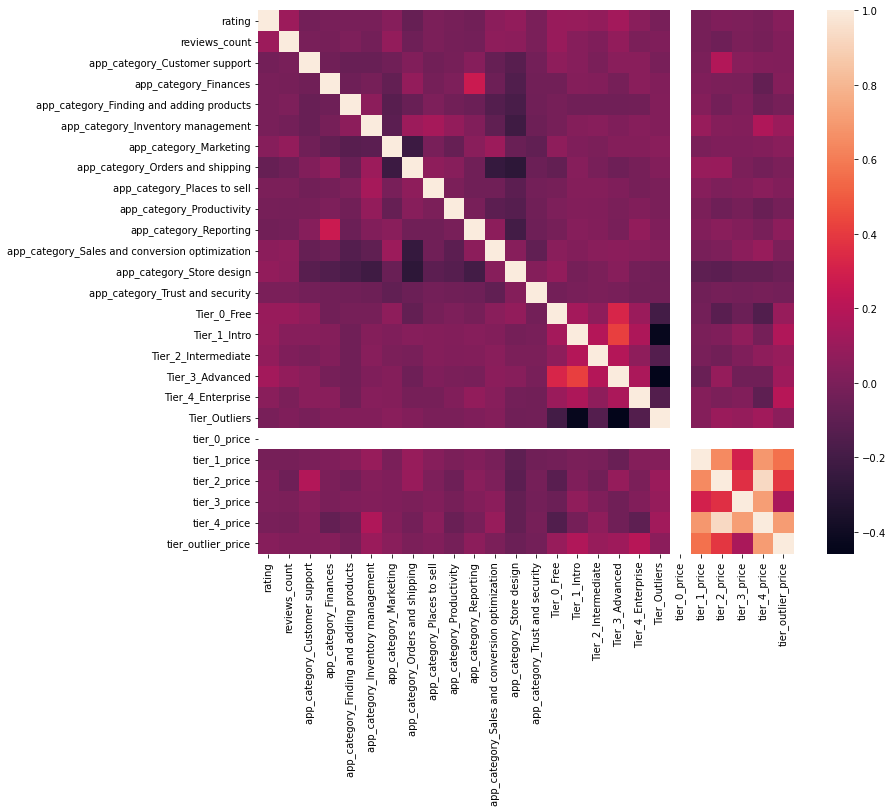

In [44]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr());

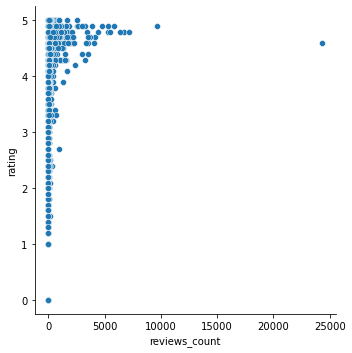

In [45]:
#Review of entire data set
sns.relplot(
    data=df,
    x="reviews_count", y="rating")

In [46]:
#subset of data by app type
app_subsets_dict = {'cust_support_apps': df[df['app_category_Customer support'] == 1],
                   'finances_apps': df[df['app_category_Finances'] == 1],
                    'find_add_products_apps' : df[df['app_category_Finding and adding products'] == 1],
                    'inventory_mgmt_apps' : df[df['app_category_Inventory management'] == 1],
                    'marketing_apps' : df[df['app_category_Marketing'] == 1],
                    'orders_shipping_apps' : df[df['app_category_Orders and shipping'] == 1],
                    'places_to_sell_apps' : df[df['app_category_Places to sell'] == 1],
                    'productivity_apps' : df[df['app_category_Productivity'] == 1],
                    'reporting_apps' : df[df['app_category_Reporting'] == 1],
                    'sales_conversion_optimization_apps' : df[df['app_category_Sales and conversion optimization'] == 1],
                    'store_design_apps' : df[df['app_category_Store design'] == 1],
                    'trust_security_apps' : df[df['app_category_Trust and security'] == 1]}

#subset of data by pricing tier
price_subsets_dict = {'free_tier' : df[df['Tier_0_Free'] == 1],
                      'intro_tier' : df[df['Tier_1_Intro'] == 1],
                      'intermediate_tier' : df[df['Tier_2_Intermediate'] == 1],
                      'adv_tier' : df[df['Tier_3_Advanced'] == 1],
                      'enterprise_tier' : df[df['Tier_4_Enterprise'] == 1],
                      'outlier_tier' : df[df['Tier_Outliers'] == 1]}

In [47]:
for k, v in app_subsets_dict.items():
    print(str(k) + " has " + str(v.shape[0]) + " entries")

cust_support_apps has 409 entries
finances_apps has 163 entries
find_add_products_apps has 252 entries
inventory_mgmt_apps has 342 entries
marketing_apps has 1068 entries
orders_shipping_apps has 858 entries
places_to_sell_apps has 127 entries
productivity_apps has 282 entries
reporting_apps has 350 entries
sales_conversion_optimization_apps has 1294 entries
store_design_apps has 2087 entries
trust_security_apps has 144 entries


In [48]:
for k, v in price_subsets_dict.items():
    print(str(k) + " has " + str(v.shape[0]) + " entries")

free_tier has 678 entries
intro_tier has 1146 entries
intermediate_tier has 255 entries
adv_tier has 1108 entries
enterprise_tier has 291 entries
outlier_tier has 3091 entries


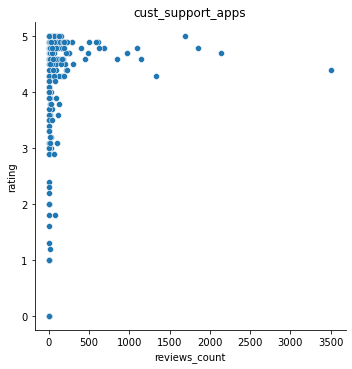

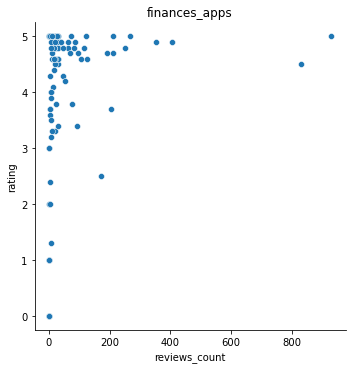

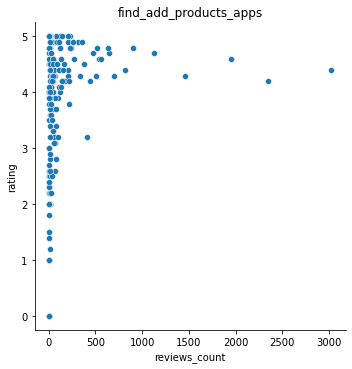

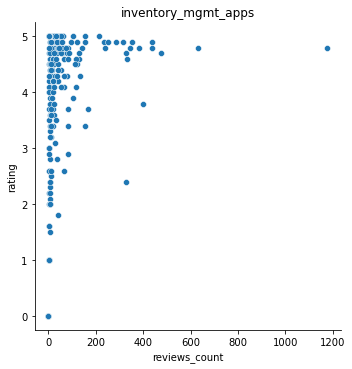

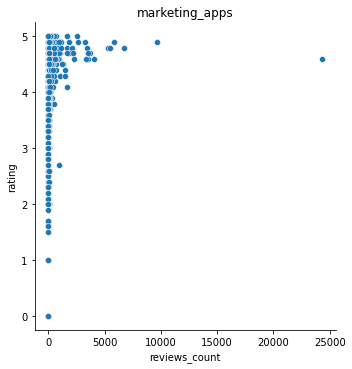

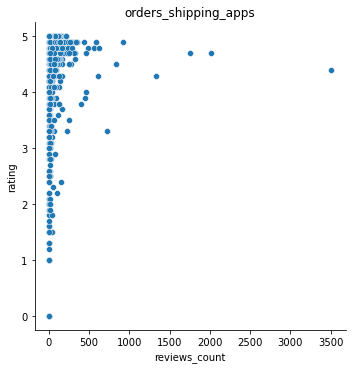

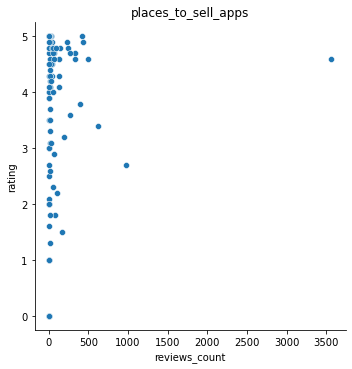

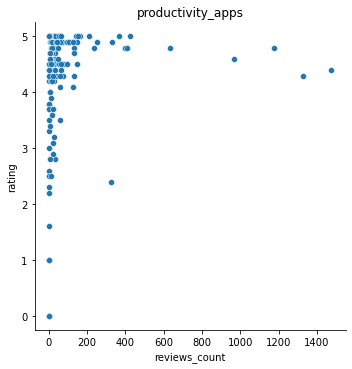

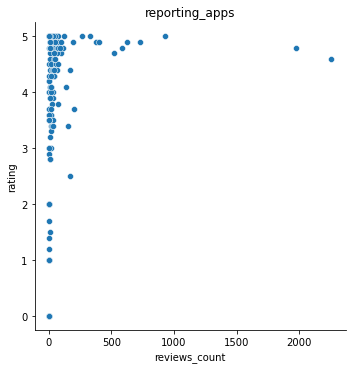

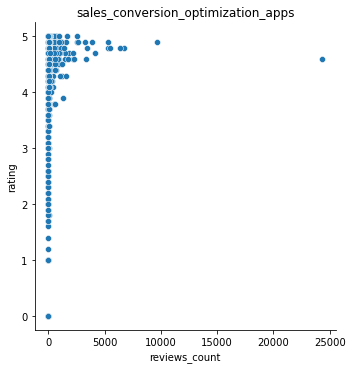

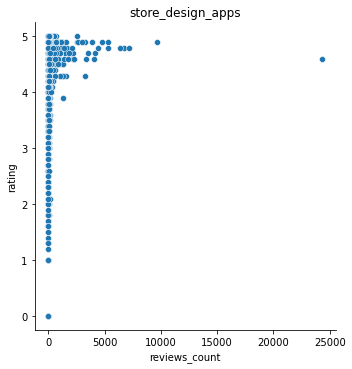

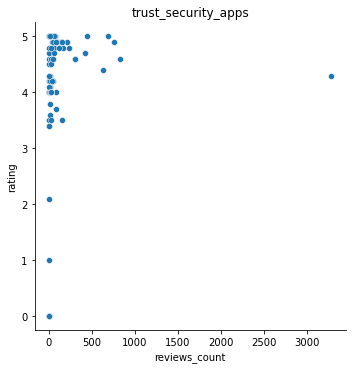

In [49]:
#Analysis by App Type
for k,v in app_subsets_dict.items():
    sns.relplot(
    data=app_subsets_dict[k],
    x="reviews_count", y="rating")
    plt.title(k)


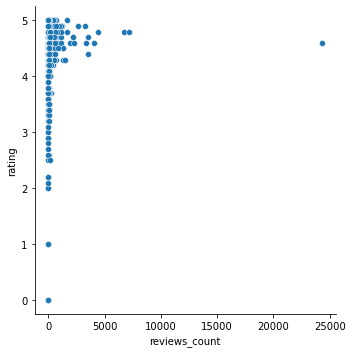

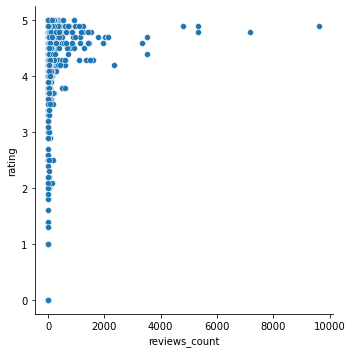

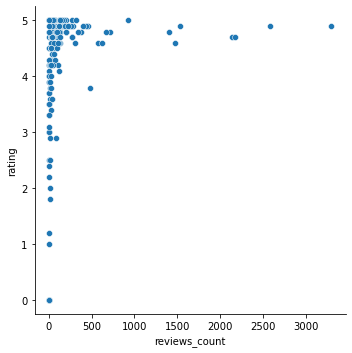

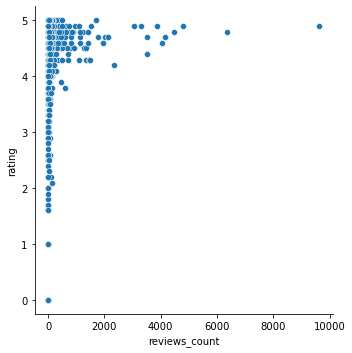

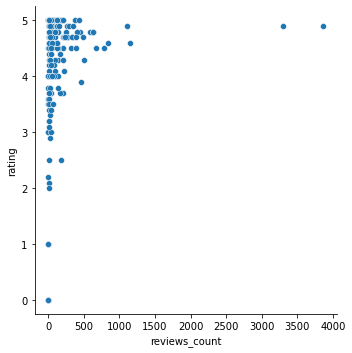

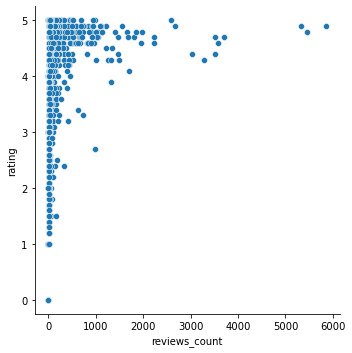

In [57]:
#Analysis by pricing Type
for k,v in price_subsets_dict.items():
    sns.relplot(
    data=price_subsets_dict[k],
    x="reviews_count", y="rating")

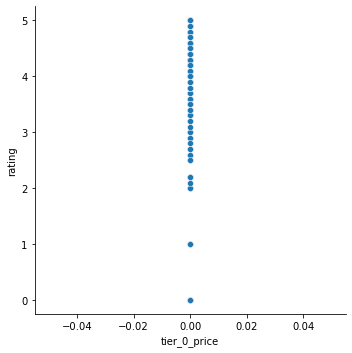

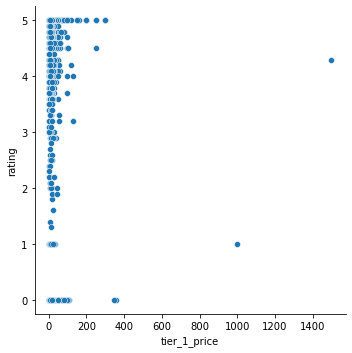

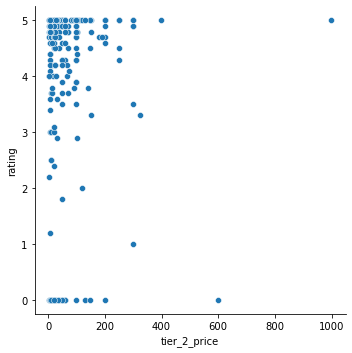

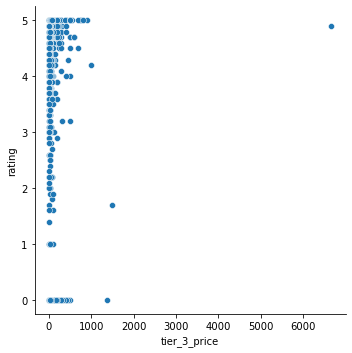

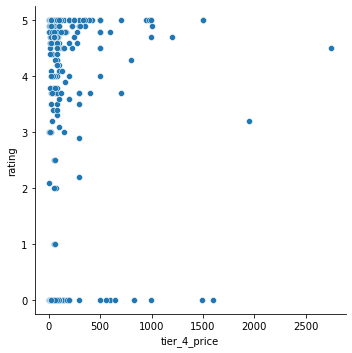

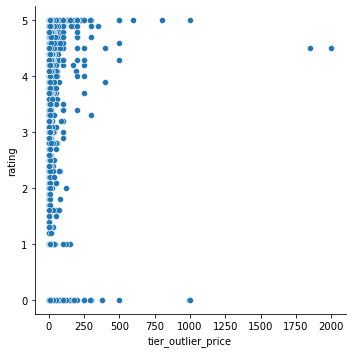

In [58]:
sns.relplot(data=df, 
           y="rating", x="tier_0_price")

sns.relplot(data=df, 
           y="rating", x="tier_1_price")

sns.relplot(data=df, 
           y="rating", x="tier_2_price")

sns.relplot(data=df, 
           y="rating", x="tier_3_price")

sns.relplot(data=df, 
           y="rating", x="tier_4_price")

sns.relplot(data=df, 
           y="rating", x="tier_outlier_price")